# Group Name: PPG
## Group Members: 
- Asis, Alleona Divine M.
- Samson, Kaye V.
- Valenzuela, Johannabel DC.

# Importing the Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing and Loading the Dataset

In [16]:
student_pass.csv = pd.read_csv('/kaggle/input/student-pass-csv/student_pass.csv')
student_pass.csv

/tmp/ipykernel_30/2915798788.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  student_pass.csv = pd.read_csv('/kaggle/input/student-pass-csv/student_pass.csv')


,Hours_Studied,Pass
0,6.39,1
1,0.25,0
2,2.23,1
3,6.77,1
4,8.92,1
5,0.87,0
6,0.30,0
7,5.05,1
8,0.27,0
9,6.50,1


# Visualizing the Dataset

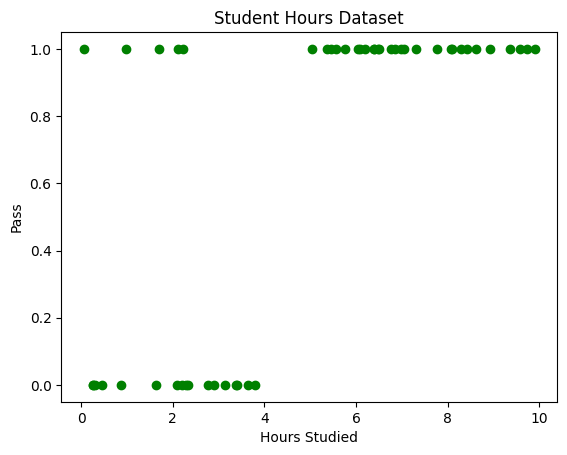

In [17]:
plt.scatter(student_pass.csv["Hours_Studied"], student_pass.csv["Pass"], color="green")
plt.title("Student Hours Dataset")
plt.xlabel("Hours Studied")
plt.ylabel("Pass")

# Save the figure
plt.savefig("studentHours.png")  # Save as a PNG file

plt.show()

# Implementing Logistic Regression

## Splitting the Dataset into Training Sets and Test Sets

In [18]:
X = student_pass.csv[['Hours_Studied']]
y = student_pass.csv['Pass']  

## Split into training and test data 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Logistic Regression Model

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Making Predictions

In [21]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

## Visualizing the Logistic Curve

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


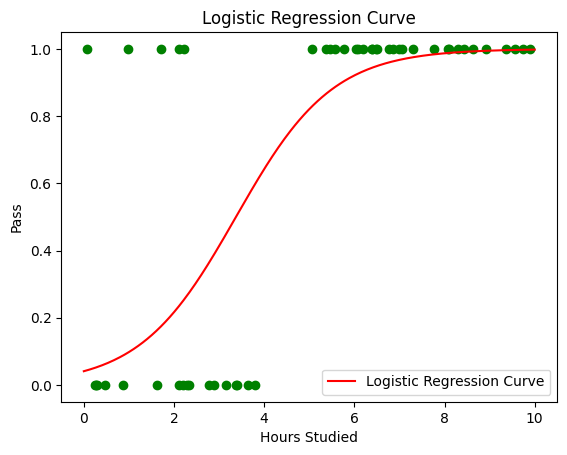

<Figure size 640x480 with 0 Axes>

In [22]:
x_values = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_values)[:, 1]

plt.scatter(student_pass.csv['Hours_Studied'], student_pass.csv['Pass'], color='green')
plt.plot(x_values, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Pass")
plt.title("Logistic Regression Curve")

plt.legend()
plt.show()

# Save the figure
plt.savefig("studentHoursRegression.png")  # Save as a PNG file

## Calculating Accuracy of Logistic Model

In [23]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8

# Interpretations

> The Logistic Regression Model has displayed an accuracy of having an 80%. In addition, the correlation between the hours studied and the probability of passing shows a directly proportional relationship. The logistic curve shows this trend, but it doesn't assume a strict linear relationship.

# Making Predictions Based on Given Study Hours

In [24]:
hours_to_predict = [3, 6, 9]  
hours_to_predict_df = pd.DataFrame(hours_to_predict, columns=['Hours_Studied']) 
predictions = log_reg.predict_proba(hours_to_predict_df)

In [25]:
for hours, prob in zip(hours_to_predict, predictions[:, 1]):
    print(f"Hours Studied = {hours} -> Probability of Passing = {prob * 100:.2f}%")

Hours Studied = 3 -> Probability of Passing = 41.34%
Hours Studied = 6 -> Probability of Passing = 92.11%
Hours Studied = 9 -> Probability of Passing = 99.49%
